In [151]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)

In [108]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"
figure_folder = "../../figures"

| Field          | Description                                                     | Type of variable |
|----------------|-----------------------------------------------------------------|------------------|
| fixVersions    | Search for issues that are assigned to a particular fix version | list of versions |
| issuetype      | Type of issue                                                   | Categorical      |
| project        | The project the issue belongs to                                | String           |
| resolution     | The resolution of the issue                                     | Categorical      |
| resolutiondate | The date the issue was resolved                                 | Date             |
| workratio      | calculated as workRatio = (timeSpent / originalEstimate) x 100  | Number           |
| lastViewed     | The date at which the issue was last viewed                     | Date             |
| watches        | Users watching the issue                                        | ?                |
| created        | The date of the creation of the issue                           | Date             |
| priority       | Priority assigned to the issue                                  | Categorical      |
| labels         | Labels assigned to the issue                                    | Strings          |
| versions       | The versions affected by the issue                              | List             |
| assignee       | The user the issue is assigned to                               | User             |
| status         | The status of the issue                                         | Categorical      |
| description    | The description of the issue                                    | String           |
| summary        | A summary of the issue reported                                 | String           |
| creator        | The user that created the issue                                 | User             |
| subtasks       | The subtasks of the issue                                       | List of issues   |
| reporter       | The user who reported the issue. May be the same as the creator | User             |
| duedate        | The date the issue is due to be resolved                        | Date             |

### Import tags

In [3]:
tags = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
tags.Date = pd.to_datetime(tags.Date)
tags = tags[tags.Date > "2015-03-10"]
tags["month"] = tags.Date.dt.month
tags["year"] = tags.Date.dt.year
tags.head()

,actual_release_date,Tag,Sha,Date,month,year,major_version,jira_version
0,NaN,4.5.6,12d931e5a31e1692a428bbb34ba11cd63aebf998,2015-10-16 09:31:18,10,2015,4,4.5.6
1,NaN,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23 00:00:00,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaN,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaN,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2


### Import issues

In [48]:
issues = pd.read_csv(f"{csv_folder}/issues_community.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues.head()

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
1,SONAR-14168,99609,Sub-task,P3-Medium,0|i0duvz:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-11-19 14:02:04+00:00,-1,NaT,<JIRA Watchers at 5037154944>,2020-11-19 11:10:36+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jeremy Davis,2020-11-19 14:02:04+00:00,Resolved,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,[UI] Realign projects' API,Jeremy Davis,[],NaN,NaN,Jeremy Davis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-11-26 00:00:00+00:00,0,5,Sub-task,3,Major,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,5,Resolved,1.0,Fixed,0
2,SONAR-14167,99607,Documentation,P3-Medium,0|i0duvj:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.6', id='16435'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5037155760>,2020-11-19 09:46:02+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='55366'>],Mike Birnstiehl,2020-11-19 09:46:47+00:00,Open,"[<JIRA Component: name='Documentation', id='11...",NaN,NaN,NaN,NaN,NaN,* Add insights on how to quickly analyze a pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Improve the Azure DevOps integration page,Philippe Perrin,[],NaN,NaN,Philippe Perrin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,6,Documentation,3,Major,michael.birnstiehl,michael.birnstiehl,philippe.perrin,philippe.perrin,philippe.perrin,philippe.perrin,1,Open,NaN,NaN,0
3,SONAR-14166,99584,Task,P3-Medium,0|i0duqf:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.6', id='16435'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5037157008>,2020-11-18 13:24:30+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['analyzer-upgrade'],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-11-18 13:25:07+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Improve LITS analysis,Malena Ebert,[],NaN,NaN,SonarQube Technical user,NaN,NaN,

In [49]:
issues.shape

(7163, 108)

We filter only issues in the timeframe in which the project was using TravisCI

### Import versions

In [50]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head()

,issue_id,version_name,version_id
0,99500,8.5,16342
1,99361,8.5,16342
2,99004,8.5.1,16458
3,98951,8.4,15833
4,98652,8.1,15243


### Import fixVersions

In [51]:
fixversions = pd.read_csv(f"{csv_folder}/issues_fixversions.csv", index_col=0)
fixversions = fixversions[fixversions.issue_id.isin(issues.issue_id)]
fixversions.head(5)

,issue_id,fixVersion_name,fixVersion_id
0,99607,8.6,16435
1,99584,8.6,16435
2,99583,8.6,16435
3,99582,8.6,16435
4,99581,8.6,16435


### Import labels

In [52]:
labels = pd.read_csv(f"{csv_folder}/issues_labels.csv", index_col=0)
labels = labels[labels.issue_id.isin(issues.issue_id)]
labels.head()

,issue_id,label
0,99584,analyzer-upgrade
1,99583,analyzer-upgrade
2,99582,analyzer-upgrade
3,99581,analyzer-upgrade
4,99554,Events


### Import components

In [53]:
components = pd.read_csv(f"{csv_folder}/issues_components.csv", index_col=0)
components = components[components.issue_id.isin(issues.issue_id)]
components.head()

,issue_id,component_name,component_id
0,99607,Documentation,11067
1,99569,Authentication & Authorization,11086
2,99563,Web API,11100
3,99554,Web API,11100
4,99553,Issues,11096


### Import subtasks

In [54]:
substaks = pd.read_csv(f"{csv_folder}/issues_subtasks.csv", index_col=0)
substaks = substaks[substaks.issue_id.isin(issues.issue_id)]
substaks.head()

,issue_id,subtask_key,subtask_id
4,98843,SONAR-14098,99040
5,98843,SONAR-14109,99112
22,98734,SONAR-14034,98735
23,98734,SONAR-14035,98736
24,98734,SONAR-14036,98737


## Analysis

### Shape

In [55]:
issues.shape

(7163, 108)

In [56]:
fixversions.shape

(6707, 3)

In [57]:
versions.shape

(3351, 3)

In [58]:
labels.shape

(2279, 2)

In [59]:
substaks.shape

(750, 3)

### Select only issues affecting the analysed release

In [60]:
versions_issues = versions.merge(issues[["issue_id","issuetype_name"]], on="issue_id")

In [61]:
versions_issues[versions_issues.version_name > "5.2"].version_name.nunique()

54

### Columns

In [62]:
issues.columns

Index(['issue_key', 'issue_id', 'issuetype', 'customfield_12130',
       'customfield_11041', 'customfield_12132', 'customfield_12131',
       'project', 'customfield_12134', 'customfield_12530',
       ...
       'assignee_name', 'reporter_key', 'reporter_name', 'creator_key',
       'creator_name', 'status_id', 'status_name', 'resolution_id',
       'resolution_name', 'votes_votes'],
      dtype='object', length=108)

In [63]:
versions.columns

Index(['issue_id', 'version_name', 'version_id'], dtype='object')

In [64]:
fixversions.columns

Index(['issue_id', 'fixVersion_name', 'fixVersion_id'], dtype='object')

In [65]:
labels.columns

Index(['issue_id', 'label'], dtype='object')

In [66]:
substaks.columns

Index(['issue_id', 'subtask_key', 'subtask_id'], dtype='object')

### Describe

In [67]:
issues.describe()

,issue_id,customfield_12131,customfield_12530,customfield_12532,customfield_10431,customfield_12531,customfield_10432,customfield_12534,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,workratio,customfield_11032,customfield_11033,customfield_11233,customfield_11036,customfield_11830,customfield_11347,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,customfield_12032,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11139,customfield_11338,customfield_11130,customfield_11131,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_10434,customfield_12535,customfield_12139,customfield_12538,customfield_12537,votes,issuetype_id,priority_id,status_id,resolution_id,votes_votes
count,7163.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7163.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7163.000000,7163.000000,7163.000000,7163.000000,6638.000000,7163.000000
mean,53804.984364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.828005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326120,3.162641,3.081670,43.327796,69.454354,0.326120
std,23579.040919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.774207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.942628,1.414782,0.374267,612.561906,837.571479,2.942628
min,26471.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30346.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,3.000000,6.000000,1.000000,0.000000
50%,50710.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,3.000000,6.000000,1.000000,0.000000
75%,73601.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,3.000000,6.000000,1.000000,0.000000
max,99609.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.000000,6.000000,5.000000,10002.000000,10601.000000,192.000000


In [68]:
issues.describe(include = ['O'])

,issue_key,issuetype,customfield_12130,customfield_11041,customfield_12132,project,customfield_12134,fixVersions,customfield_12133,customfield_12136,resolution,customfield_12135,customfield_12138,customfield_12137,watches,priority,edition,labels,customfield_11631,customfield_11038,customfield_10930,customfield_10931,customfield_10932,versions,issuelinks,assignee,status,components,description,customfield_12034,customfield_12430,customfield_11930,summary,creator,subtasks,reporter,customfield_11730,customfield_12536,environment,customfield_10437,customfield_10438,issuetype_name,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_name,resolution_name
count,7163,7163,916,7163,916,7163,916,7163,916,916,6638,916,916,916,7163,7163,2049,7163,1810,2,1,4,9,7163,7163,6464,7163,7163,6063,1055,2,7163,7163,7162,7163,7162,95,231,75,4468,7163,7163,7163,6464,6464,7162,7162,7162,7162,7163,6638
unique,7163,6,1,7163,1,1,1,181,1,1,12,1,1,1,7163,5,2,198,29,2,1,1,1,213,3137,67,7,377,6020,1,2,1,7141,232,163,234,3,1,73,2,1,6,5,67,67,235,235,233,233,7,12
top,SONAR-4882,Improvement,P3-Medium,0|i03c9b:,No root cause identified,SONAR,Not captured yet,[],Not assessed yet,Not captured yet,Fixed,No action plan,Not captured yet,Not captured yet,<JIRA Watchers at 5201105440>,Major,Community,[],None,MMF-29,https://github.com/SonarSource/sonar/pull/4,yes,"[<JIRA CustomFieldOption: value='Yes', id='107...",[],[],Simon Brandhof,Closed,[],Template names are unique by organization. Con...,SonarQube,https://sonarsource.productboard.com/feature-b...,{},Upgrade code analyzers to latest released vers...,Simon Brandhof,[],Simon Brandhof,Minutes,New,MySQL,,[],Improvement,Major,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,Closed,Fixed
freq,1,3667,916,1,916,7163,916,986,916,916,6343,916,916,916,1,6430,2033,5101,1782,1,1,4,9,5958,3814,953,6608,1324,8,1055,1,7163,10,835,7001,834,49,231,2,4072,7163,3667,6430,953,953,834,834,835,835,6608,6343


* Votes has 75% percentile to 0 (most of the issues did not get votes) but has also a value of 14
* There are 6 issuetypes
* There are 7 statuses
    
We therefore safely remove one of each columns and keep the one in the more human readable form

In [69]:
duplicated_columns = ["issuetype", "assignee_key", "creator_key", "resolution", "priority", "reporter_key", "resolution_id"]

In [70]:
issues = issues[set(issues.columns) - set(duplicated_columns)]

In [71]:
fixversions.describe()

,issue_id,fixVersion_id
count,6707.000000,6707.000000
mean,51066.175936,13062.324884
std,21787.321803,1442.283546
min,26471.000000,11545.000000
25%,30030.500000,11618.000000
50%,48857.000000,13026.000000
75%,65551.000000,14041.000000
max,99607.000000,16510.000000


In [72]:
versions.describe()

,issue_id,version_id
count,3351.000000,3351.000000
mean,40305.948672,12188.098478
std,19081.372449,1157.858738
min,26470.000000,11523.000000
25%,28849.500000,11556.000000
50%,30946.000000,11585.000000
75%,46216.000000,11647.000000
max,99500.000000,16458.000000


In [73]:
labels.describe()

,issue_id
count,2279.000000
mean,62288.368144
std,15590.103878
min,26510.000000
25%,52377.500000
50%,59541.000000
75%,67327.500000
max,99584.000000


In [74]:
substaks.describe()

,issue_id,subtask_id
count,750.000000,750.000000
mean,45821.753333,46701.014667
std,21404.698536,21502.956104
min,26567.000000,26526.000000
25%,29310.000000,29228.250000
50%,31873.000000,31902.500000
75%,61672.000000,61896.750000
max,98843.000000,99621.000000


We do not detect anomalies in the statistical summaries of the other datasets

### Filter only the needed columns

In [86]:
issues_cols = ["issue_id", "issuetype_name", "resolution_name", "resolutiondate", "created", "priority_name", "versions", "status", "edition"]
issues = issues[issues_cols]

### Missing values

In [87]:
issues.isna().sum().sort_values(ascending=False).head(15)

edition            5114
resolutiondate      525
resolution_name     525
status                0
versions              0
priority_name         0
created               0
issuetype_name        0
issue_id              0
dtype: int64

In [89]:
issues[issues.resolution_name.isna()].status.value_counts()

Open           484
To Do           23
In Progress     12
In Review        4
Reopened         2
Name: status, dtype: int64

Drop edition columns

In [90]:
issues = issues.drop(columns=["edition"])

In [91]:
fixversions.isna().sum()

issue_id           0
fixVersion_name    0
fixVersion_id      0
dtype: int64

In [92]:
versions.isna().sum()

issue_id        0
version_name    0
version_id      0
dtype: int64

In [93]:
labels.isna().sum()

issue_id    0
label       0
dtype: int64

In [94]:
substaks.isna().sum()

issue_id       0
subtask_key    0
subtask_id     0
dtype: int64

* There are missing values only in the issues dataset
* All fields presenting missing values are fields which are optional in an issue. We therefore not worry about their absence even though that has to be taken into account when working with those fields.

## In depth analysis

### IssueType

In [56]:
issues.issuetype_name.unique()

array(['Task', 'New Feature', 'Improvement', 'Documentation', 'Sub-task',
       'Bug'], dtype=object)

In [57]:
issues.issuetype_name.value_counts()

Improvement      2442
Bug              1001
Task              366
Sub-task          299
New Feature       284
Documentation      86
Name: issuetype_name, dtype: int64

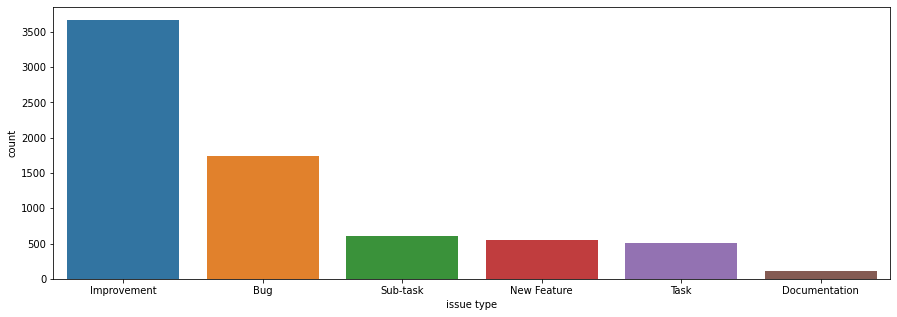

In [113]:
plt.figure()
ax = sns.countplot(x="issuetype_name", data=issues[["issue_id", "issuetype_name"]],\
              order=issues.issuetype_name.value_counts().index)
ax.set(xlabel="issue type")
plt.savefig(f"{figure_folder}/issues/issuetype_dist.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

In [59]:
issues.issuetype_name.value_counts(normalize=True)

Improvement      0.545333
Bug              0.223537
Task             0.081733
Sub-task         0.066771
New Feature      0.063421
Documentation    0.019205
Name: issuetype_name, dtype: float64

* We see that issues can only have one of these 6 issue types.
* 54% is Improvement, followed by 22% Bug

**Focus only on bugs**

In [114]:
issues = issues[issues.issuetype_name=="Bug"]

In [115]:
issues.shape

(1736, 8)

### Versions

In [116]:
versions_merged = versions.merge(issues, on="issue_id")

In [117]:
versions_merged.version_name.sort_values().unique()

array(['1.10', '1.10.1', '1.12', '1.5', '1.7', '1.9', '1.9.1', '1.9.2',
       '2.0', '2.0.1', '2.1', '2.1.2', '2.10', '2.11', '2.12', '2.13',
       '2.13.1', '2.14', '2.2', '2.3', '2.4', '2.4.1', '2.5', '2.6',
       '2.7', '2.8', '2.9', '3.0', '3.0.1', '3.1', '3.1.1', '3.2',
       '3.2.1', '3.3', '3.3.1', '3.3.2', '3.4', '3.4.1', '3.5', '3.5.1',
       '3.6', '3.6.1', '3.6.2', '3.6.3', '3.7', '3.7.1', '3.7.2', '3.7.3',
       '4.0', '4.1', '4.2', '4.3', '4.3.1', '4.3.2', '4.3.3', '4.4',
       '4.5', '4.5.1', '4.5.2', '4.5.4', '4.5.5', '4.5.6', '4.5.7', '5.0',
       '5.0.1', '5.1', '5.1.1', '5.1.2', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.6.1', '5.6.2', '5.6.3', '5.6.4', '5.6.5', '5.6.6',
       '5.6.7', '6.0', '6.1', '6.1.1', '6.2', '6.3', '6.3.1', '6.3.2',
       '6.4', '6.5', '6.5-M1', '6.6', '6.6-M1', '6.7', '6.7.1', '6.7.2',
       '6.7.3', '6.7.4', '6.7.5', '6.7.6', '6.7.7', '7.0', '7.1', '7.2',
       '7.2.1', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.9.1',
 

In [175]:
len(versions_merged.version_name.unique())

123

**How many issues have a version**

In [176]:
versions_merged.issue_id.nunique() / issues.issue_id.nunique()

0.5535714285714286

**Issues with version and critical or blocker priority**

In [177]:
len(versions_merged[versions_merged.priority_name.isin(["Blocker", "Critical"])])

88

**Number of versions per tags**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

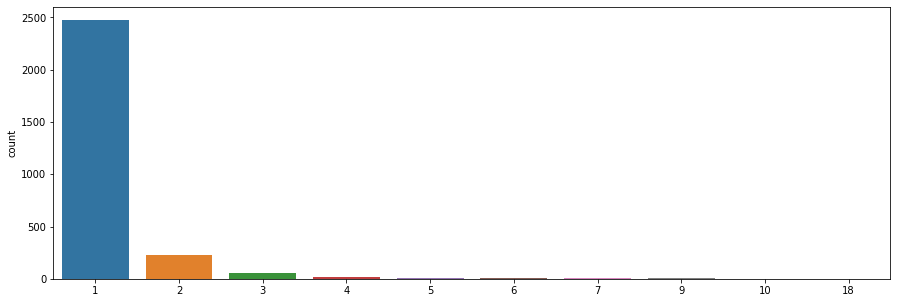

In [178]:
sns.countplot(versions.groupby("issue_id").count().version_name.values)

**Distribution of missing tags on Jira**

In [179]:
#Versions on Jira have a slightly different format at times. This functions formats the versions to match Jira's
def polish_version(version):
    if "latest" in version:
        return None
    splits = version.split(".")
    major = splits[0]
    release = splits[1]
    if(len(splits)>2):
        modification = splits[2]
        if(modification != "0"):
            return f"{major}.{release}.{modification}"
    """if("-" in release):
        release = release.split("-")[0]"""
    return f"{major}.{release}"
releases = set(map(lambda version: polish_version(version), tags.Tag.unique()))

### Type of version

In [185]:
def type_of_version(version):
    if "RC" in version: 
        return "Release candidates"
    if "M" in version:
        return "Milestones"
    return "Normal releases"

<AxesSubplot:>

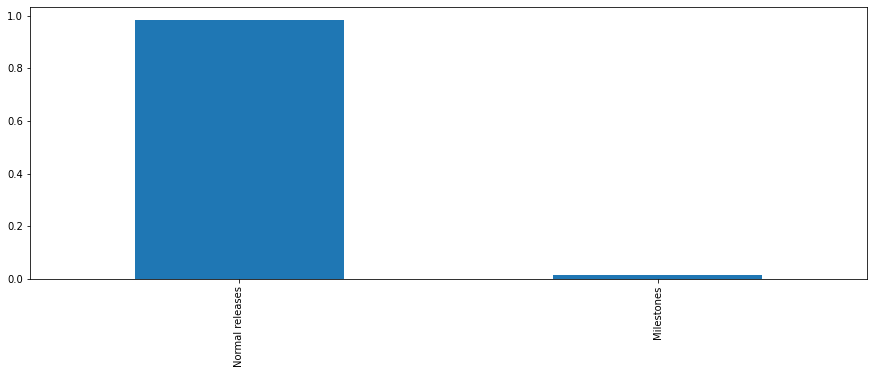

In [193]:
pd.Series(map(type_of_version,versions_merged.version_name.unique())).value_counts(normalize=True).plot(kind="bar")

In [197]:
pd.Series(map(type_of_version,versions_merged.version_name.unique())).value_counts()

Normal releases    121
Milestones           2
dtype: int64

**Tags present on Jira but not on Github**

In [200]:
len(set(versions.version_name.sort_values().unique()).difference(set(releases)))

88

In [201]:
len(set(set(versions.version_name.sort_values().unique())).intersection(set(releases)))

57

**Report time distribution**

In [134]:
all_tags = pd.read_csv(f"{csv_folder}/tags.csv", index_col=0)
all_tags.shape

(186, 4)

In [137]:
all_tags = all_tags[all_tags.Tag.apply(lambda x: not "RC" in x and not "M" in x)]
all_tags["jira_version"] = all_tags.Tag.apply(polish_version)
all_tags.Date = pd.to_datetime(all_tags.Date)

In [139]:
versions_merged_all_tags = versions_merged.merge(all_tags[["jira_version", "Date"]], left_on="version_name", right_on="jira_version")

In [163]:
versions_merged_all_tags.created = pd.to_datetime(versions_merged_all_tags.created)
report_time = (versions_merged_all_tags.created.dt.tz_localize(None) - versions_merged_all_tags.Date)\
            / np.timedelta64(1, 'D')

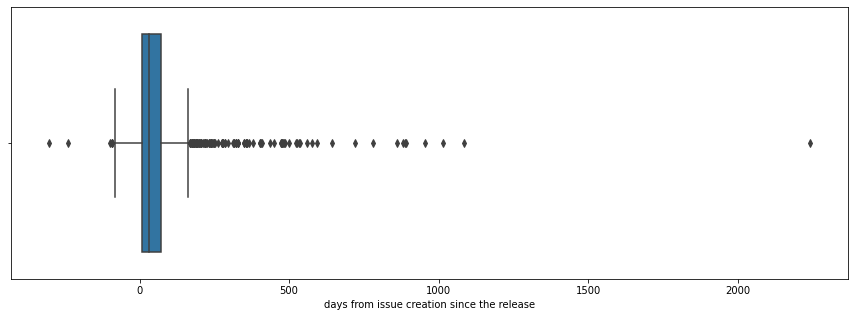

In [173]:
plt.figure()
ax = sns.boxplot(x=report_time)
ax.set(xlabel="days from issue creation since the release")
plt.savefig(f"{figure_folder}/issues/opening_time_since_release.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

In [165]:
report_time.describe()

count    1081.000000
mean       67.376757
std       138.711320
min      -303.976921
25%         8.911076
50%        31.021574
75%        70.572222
max      2240.976551
dtype: float64

In [172]:
report_time.quantile(0.9)

171.93756944444445

**End of chapter for now, export csv**

In [210]:
issues.to_csv(f"{csv_folder}/issues_community_final.csv")

**Top versions**

In [202]:
top_versions = versions_merged.groupby("version_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)

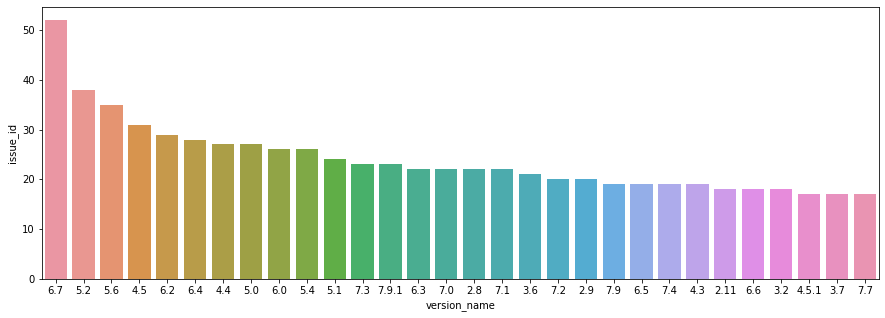

In [203]:
ax = sns.barplot(x="version_name", y="issue_id", data=top_versions[["issue_id", "version_name"]].head(30))

In [204]:
top_versions.head(10).version_name.values

array(['6.7', '5.2', '5.6', '4.5', '6.2', '6.4', '4.4', '5.0', '6.0',
       '5.4'], dtype=object)

**Distribution of issuetypes for each version**

In [205]:
versions_sorted = versions_merged.sort_values(by="version_name").version_name.unique()

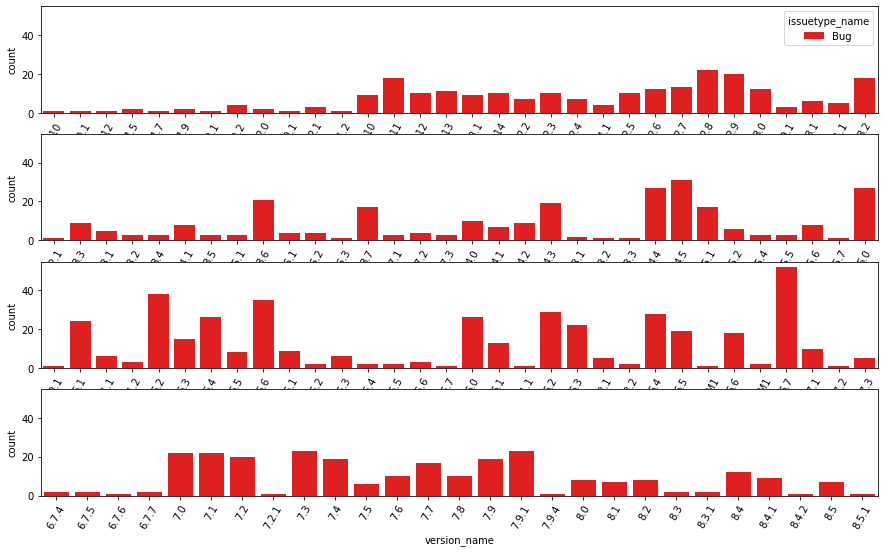

In [209]:
f, axes = plt.subplots(4,1, figsize=(15,9), sharey=True)
for i in range(4):
    data = versions_merged[versions_merged.version_name.isin(versions_sorted[32*i:32*(i+1)])]
    ax = sns.countplot(ax=axes[i], x="version_name", 
                       hue="issuetype_name", data=data.sort_values(by="version_name").head(3000),
                      palette={"Bug":"r","Improvement":"orange",
                               "New Feature": "green",
                               "Task": "yellow",
                               "Sub-task": "pink",
                              "Documentation": "grey"})
    ax.tick_params(axis='x', labelrotation= 60)
    if i > 0:
        ax.get_legend().remove()

**Time distribution of creation**

In [60]:
issues["created_month"] = issues.created.dt.month
issues["created_year"] = issues.created.dt.year

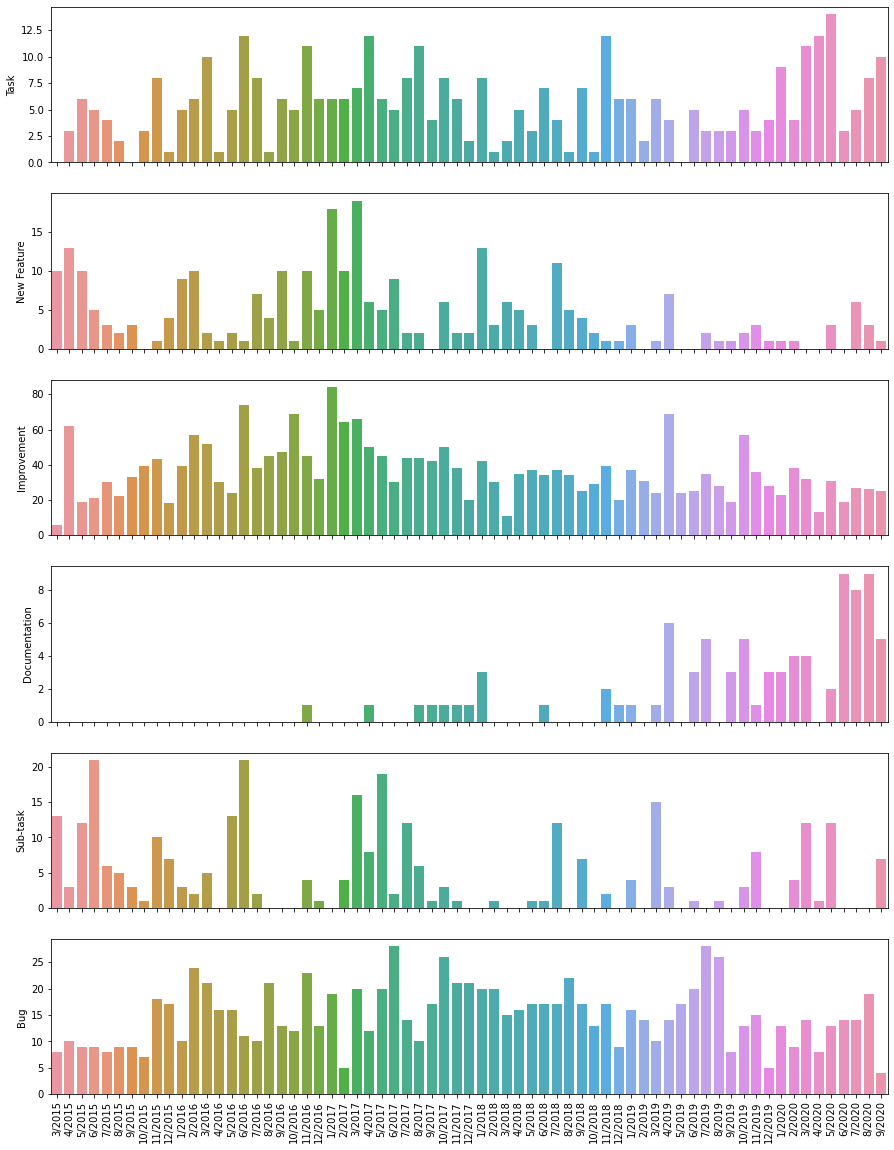

In [61]:
time_group = ["created_year", "created_month"]
f, axes = plt.subplots(len(issues.issuetype_name.unique()),1, figsize=(15,20), sharex=True)
x = issues.groupby(time_group+["issuetype_name"]).size().unstack(fill_value=0).reset_index()
for i, issuetype in enumerate(issues.issuetype_name.unique()):
    ax = sns.barplot(x=x.index, y=x[issuetype], ax=axes[i])
    ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                      rotation=90)
    ax.set_ylabel(issuetype)

* New Feature, Improvement have decresed in number over time
* Documentation has increased after 1/2019
* Bug has been quite consistent

To note that the y-axis is not the same for the different plots. We are interested in seeing their trend overtime and using the same axis would penalize the types with fewer observations. 

### Resolution

In [62]:
issues.resolution_name.unique()

array([nan, 'Fixed', 'Duplicate', "Won't Do", "Won't Fix", 'Done',
       'Not an issue', 'Canceled', 'Cannot Reproduce', 'Moved To GitHub'],
      dtype=object)

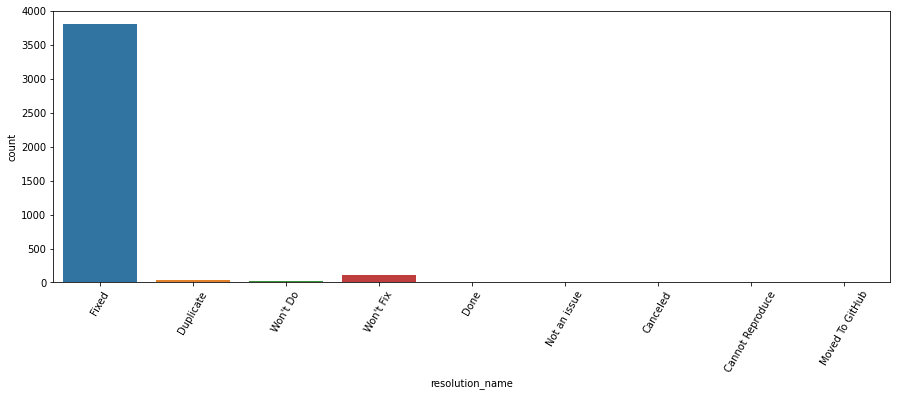

In [63]:
ax = sns.countplot(x="resolution_name", data=issues[["issue_id", "resolution_name"]])
ax.tick_params(axis='x', labelrotation= 60)

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


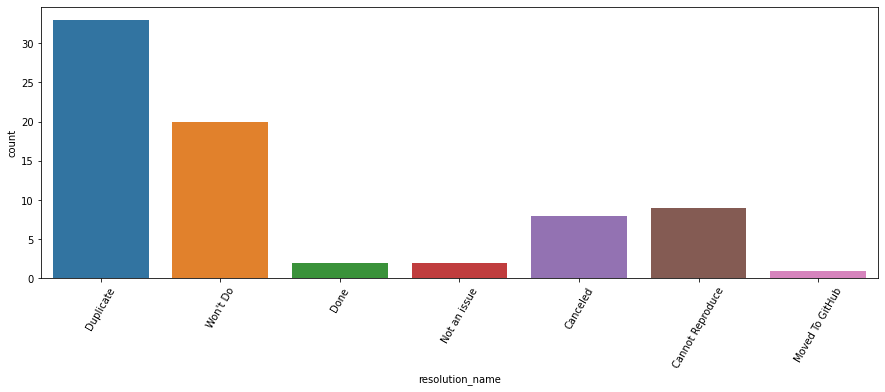

In [64]:
ax = sns.countplot(issues[~(issues.resolution_name == "Fixed") & ~(issues.resolution_name == "Won't Fix")].resolution_name)
ax.tick_params(axis='x', labelrotation= 60)

In [65]:
issues.resolution_name.value_counts(normalize=True)

Fixed               0.952571
Won't Fix           0.028707
Duplicate           0.008238
Won't Do            0.004993
Cannot Reproduce    0.002247
Canceled            0.001997
Not an issue        0.000499
Done                0.000499
Moved To GitHub     0.000250
Name: resolution_name, dtype: float64

* 95% of the resolution are Fixed
* 0.01% are duplicates (may need to be removed)

### Priority

In [66]:
issues.priority_name.unique()

array(['Major', 'Minor', 'Trivial', 'Blocker', 'Critical'], dtype=object)

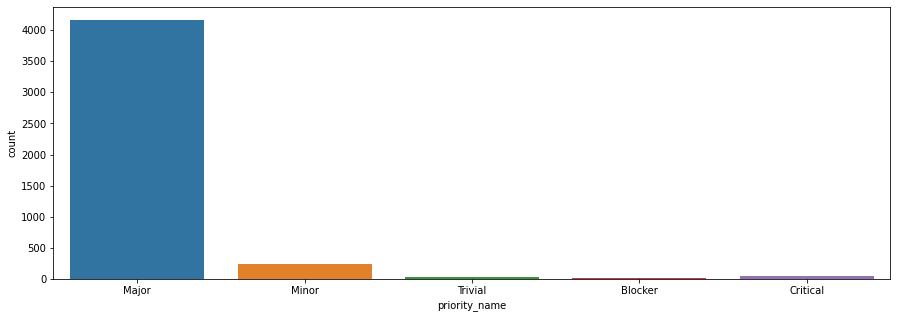

In [67]:
ax = sns.countplot(x="priority_name", data=issues[["issue_id", "priority_name"]])

In [68]:
issues.priority_name.isna().sum()

0

In [69]:
issues.priority_name.value_counts(normalize=True)

Major       0.929656
Minor       0.053149
Critical    0.008709
Trivial     0.006923
Blocker     0.001563
Name: priority_name, dtype: float64

Every issue has a priority. With issue with Major priority representing the 93%

## Labels

In [70]:
labels_merge = labels.merge(issues, on="issue_id")

**Number of labels**

In [71]:
labels.label = labels.label.str.lower()
len(labels.label.unique())

100

**Number of issues with their number of labels**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

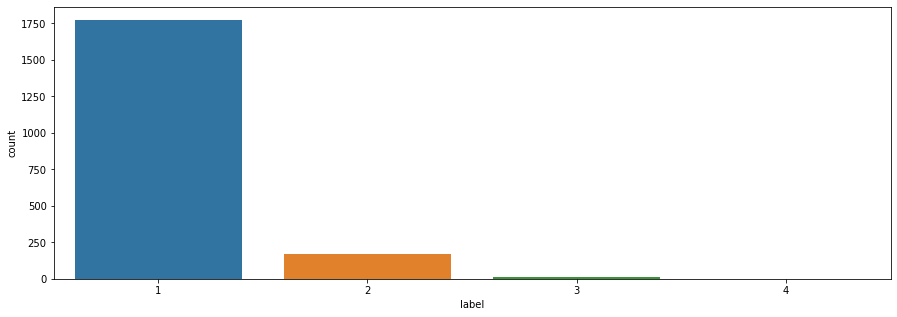

In [72]:
sns.countplot(labels_merge.groupby("issue_id").count().label)

**Top labels**

<AxesSubplot:>

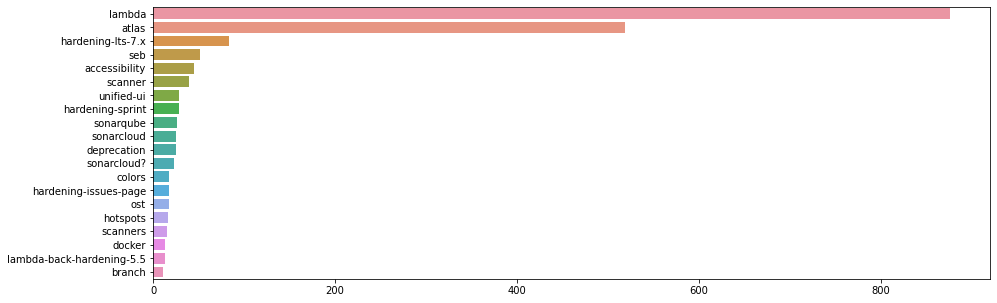

In [73]:
vals = labels.label.value_counts().head(20)
sns.barplot(x = vals.values, y=vals.index)

* Lambda label seems to be the most popular ones by far

## FixVersions

In [421]:
fixversions = fixversions[fixversions.fixVersion_name > "4.4"]
fixversions_merged = fixversions.merge(issues, on="issue_id")

In [422]:
fixversions.fixVersion_name.unique()

array(['8.5', '8.6', '8.4.2', '9.0', '8.4.1', '8.4', '7.9.4', '8.3.1',
       '8.3', '8.2', '7.9.3', '8.1', '7.9.2', '8.0', '7.9.1', '7.9',
       '7.8', '6.7.7', '7.7', '7.6', '7.5', '6.7.6', '7.4', '6.7.5',
       '7.3', '7.2.1', '7.2', '6.7.4', '7.1', '6.7.3', '6.7.2', '7.0',
       '6.7.1', '6.7', '6.6', '6.6-M3', '6.6-M2', '6.6-M1', '5.6.7',
       '6.5', '6.5-M4', '6.5-M3', '6.5-M2', '6.5-M1', '6.4', '6.3.1',
       '6.3.2', '6.3', '5.6.6', '5.6.5', '6.2', '6.2.1', '5.6.4', '6.1.1',
       '5.6.3', '6.1', '5.6.2', '6.0', '5.6.1', '5.6', '5.5', '4.5.7',
       '5.4', '5.3', '5.2', '4.5.6', '4.5.5', '5.1.2', '5.1.1', '5.1'],
      dtype=object)

In [423]:
len(fixversions.fixVersion_name.unique())

70

In [424]:
set(fixversions.fixVersion_name.unique()) - set(tags.Tag.apply(polish_version))

{'4.5.5',
 '6.2.1',
 '6.5-M2',
 '6.5-M3',
 '6.5-M4',
 '6.6-M1',
 '6.6-M2',
 '6.6-M3',
 '7.2.1',
 '7.9.2',
 '8.5',
 '8.6',
 '9.0'}

In [425]:
set(fixversions.fixVersion_name.unique()) - set(versions.version_name.unique())

{'6.2.1',
 '6.5-M2',
 '6.5-M3',
 '6.5-M4',
 '6.6-M2',
 '6.6-M3',
 '8.5',
 '8.6',
 '9.0'}

**How many fixversions each issue has?**

In [426]:
fixversions.groupby("issue_id").fixVersion_id.count().value_counts()

1    3218
2     442
3       6
Name: fixVersion_id, dtype: int64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fixVersion_id', ylabel='count'>

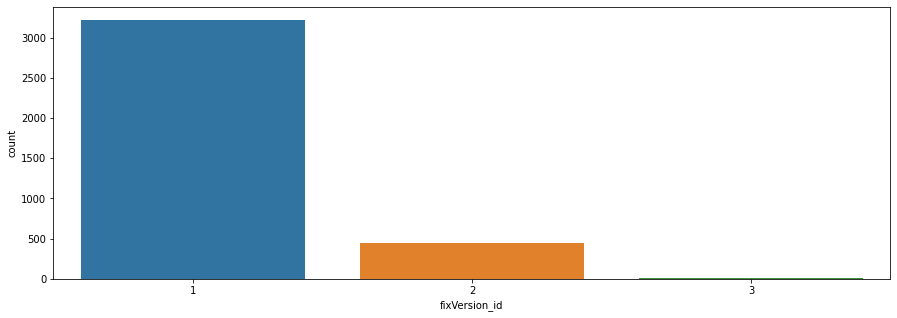

In [427]:
sns.countplot(fixversions.groupby("issue_id").fixVersion_id.count())

**Percentage of issues with a fixversion**

In [428]:
len(fixversions_merged.issue_id)/(len(issues.issue_id))*100

92.00535953550693

**Top fixversions**

In [429]:
top_fixversions = fixversions.groupby("fixVersion_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)

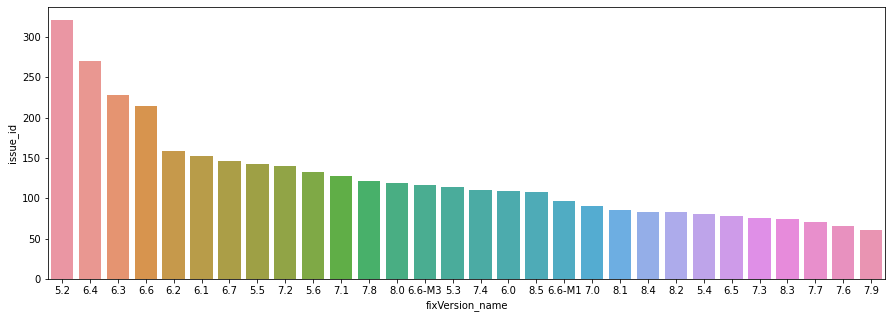

In [430]:
ax = sns.barplot(x="fixVersion_name", y="issue_id", data=top_fixversions[["issue_id", "fixVersion_name"]].head(30))

In [431]:
top_fixversions.head(10).fixVersion_name.values

array(['5.2', '6.4', '6.3', '6.6', '6.2', '6.1', '6.7', '5.5', '7.2',
       '5.6'], dtype=object)

**Distribution of issuetypes for each version**

In [432]:
fixversions_sorted = fixversions.sort_values(by="fixVersion_name").fixVersion_name.unique()

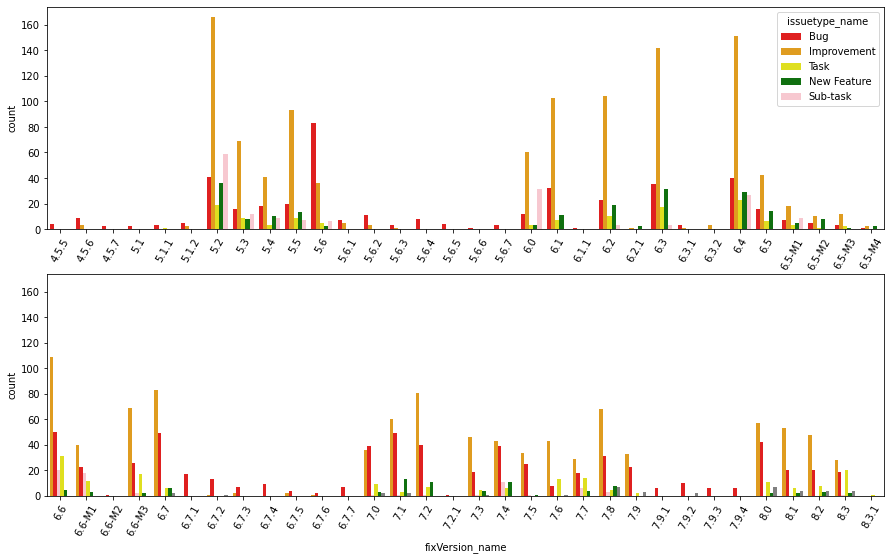

In [433]:
f, axes = plt.subplots(2,1, figsize=(15,9), sharey=True)
for i in range(2):
    data = fixversions_merged[fixversions_merged.fixVersion_name.isin(fixversions_sorted[32*i:32*(i+1)])]
    ax = sns.countplot(ax=axes[i], x="fixVersion_name", 
                       hue="issuetype_name", data=data.sort_values(by="fixVersion_name").head(3000),
                      palette={"Bug":"r","Improvement":"orange",
                               "New Feature": "green",
                               "Task": "yellow",
                               "Sub-task": "pink",
                              "Documentation": "grey"})
    ax.tick_params(axis='x', labelrotation= 60)
    if i > 0:
        ax.get_legend().remove()

**Percentage of issuestype with a version**

<AxesSubplot:xlabel='issuetype', ylabel='percentage_of_issue_with_fixversion'>

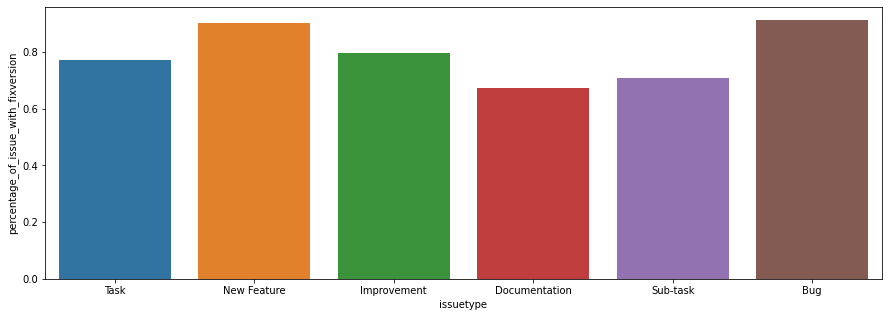

In [434]:
data = []
for issuetype in issues.issuetype_name.unique():
    issuetype_ids = issues[issues.issuetype_name == issuetype].issue_id
    data.append((issuetype, len(set(issuetype_ids).intersection(set(fixversions.issue_id)))\
                 /len(issuetype_ids)))
sns.barplot(x="issuetype", y="percentage_of_issue_with_fixversion", data=pd.DataFrame(data, columns=["issuetype", "percentage_of_issue_with_fixversion"]))

In [435]:
data

[('Task', 0.7704918032786885),
 ('New Feature', 0.9014084507042254),
 ('Improvement', 0.7960687960687961),
 ('Documentation', 0.6744186046511628),
 ('Sub-task', 0.7090301003344481),
 ('Bug', 0.913086913086913)]

* We have 70 (but 13 not on Github) fix versions we can use for our Travis analysis
* 92% of issues have a fixversion
* The issuetypes with most issues with a fixversion are Bug and New Feature

## No version issues
Ideally all bugs would be labeled with a version. Why is it not the case?

In [436]:
no_version_issues = issues[~issues.issue_id.isin(versions.issue_id.unique())]
bug_no_version = no_version_issues[no_version_issues.issuetype_name == "Bug"]
bug_no_version.head()

,created_month,votes_votes,priority_name,status,resolutiondate,assignee,created,assignee_name,reporter_name,issuetype_id,updated,issue_key,issue_id,duedate,creator_name,environment,resolution_name,votes,creator,edition,lastViewed,status_id,priority_id,issuetype_name,description,status_name,project,summary,created_year,reporter
43,9,0,Major,Closed,2020-09-18 09:41:58+00:00,Jeremy Davis,2020-09-08 07:52:57+00:00,jeremy.davis,jacek.poreda,1,2020-09-18 09:41:58+00:00,SONAR-13857,97360,2020-09-21 00:00:00+00:00,jacek.poreda,NaN,Fixed,0,Jacek Poreda,Community,NaT,6,3,Bug,Facet `Security Review` is not working while c...,Closed,SONAR,Projects page - Security Review facet on new c...,2020,Jacek Poreda
46,9,0,Major,Open,NaT,NaN,2020-09-04 22:18:18+00:00,NaN,duarte.meneses,1,2020-09-04 22:20:07+00:00,SONAR-13854,97337,NaT,duarte.meneses,NaN,NaN,0,Duarte Meneses,Community,NaT,1,3,Bug,All plugins extending a base plugin share the ...,Open,SONAR,Identification of the plugin that created a ru...,2020,Duarte Meneses
52,9,0,Major,Closed,2020-09-04 13:22:54+00:00,Jeremy Davis,2020-09-02 15:59:37+00:00,jeremy.davis,jeremy.davis,1,2020-09-04 13:22:54+00:00,SONAR-13847,97230,2020-09-10 00:00:00+00:00,jeremy.davis,NaN,Fixed,0,Jeremy Davis,Community,NaT,6,3,Bug,"When a new project is analyzed, the page is su...",Closed,SONAR,Project overview isn't refreshed after first a...,2020,Jeremy Davis
67,8,0,Major,Closed,2020-08-28 14:35:24+00:00,Duarte Meneses,2020-08-27 17:28:16+00:00,duarte.meneses,duarte.meneses,1,2020-08-28 14:35:24+00:00,SONAR-13827,97063,2020-09-03 00:00:00+00:00,duarte.meneses,NaN,Fixed,0,Duarte Meneses,Community,NaT,6,3,Bug,Due to a mistake implementing the new SCM API ...,Closed,SONAR,"New Code Period set to ""reference branch"" is n...",2020,Duarte Meneses
68,8,0,Minor,Closed,2020-08-28 12:04:45+00:00,Julien Lancelot,2020-08-27 15:49:37+00:00,julien.lancelot,julien.lancelot,1,2020-08-28 12:04:45+00:00,SONAR-13826,97061,2020-09-03 00:00:00+00:00,julien.lancelot,NaN,Fixed,0,Julien Lancelot,Community,NaT,6,4,Bug,When requesting {{api/qualityprofiles/backup}}...,Closed,SONAR,api/qualityprofiles/backup is returning HTTP c...,2020,Julien Lancelot


In [444]:
len(bug_no_version)

460

**Issues with no version and their resolution type distribution**

In [445]:
no_version_issues.resolution_name.value_counts(normalize=True)

Fixed               0.949647
Won't Fix           0.030330
Duplicate           0.007951
Won't Do            0.005889
Cannot Reproduce    0.002356
Canceled            0.002356
Done                0.000589
Not an issue        0.000589
Moved To GitHub     0.000294
Name: resolution_name, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resolution_name', ylabel='count'>

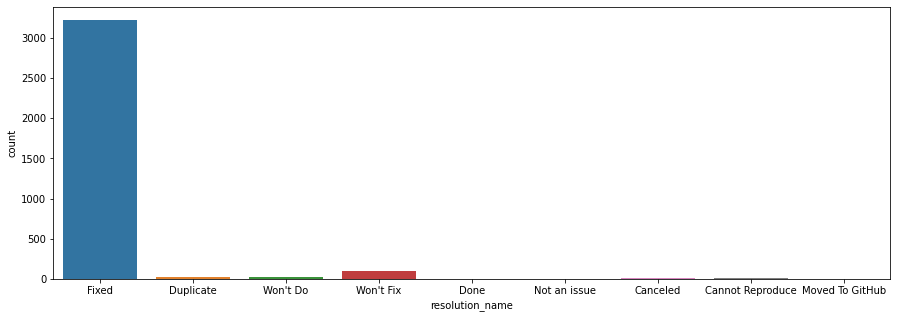

In [446]:
sns.countplot(no_version_issues.resolution_name)

**Percentage of issues with no versions over the years**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

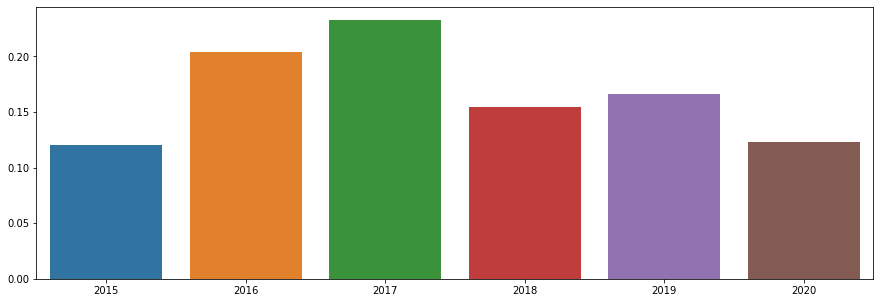

In [447]:
x = no_version_issues.created_year.value_counts(normalize=True).sort_index()
sns.barplot(x.index, x.values)

**Bugs with no version resolution type distribution**

In [450]:
bug_no_version.resolution_name.value_counts()

Fixed               415
Won't Fix            14
Cannot Reproduce      6
Duplicate             2
Name: resolution_name, dtype: int64

In [448]:
bug_no_version.resolution_name.value_counts(normalize=True)

Fixed               0.949657
Won't Fix           0.032037
Cannot Reproduce    0.013730
Duplicate           0.004577
Name: resolution_name, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resolution_name', ylabel='count'>

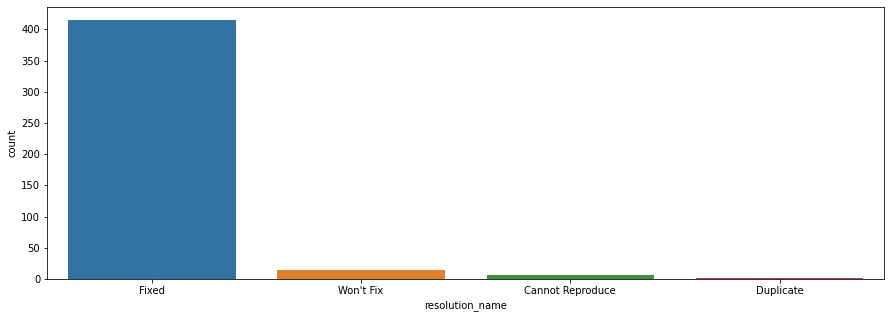

In [449]:
sns.countplot(bug_no_version.resolution_name)

* 94% of the issues with no version have been fixed
* 94% of the issues with no version AND of type Bug have been fixed

This means that for almost 415 bug issues a solution has been found. This can possibly be exploited for identifying in which version the bug was introduced.

### Status

In [442]:
issues.status.unique()

array(['Open', 'In Review', 'In Progress', 'To Do', 'Closed', 'Resolved',
       'Reopened'], dtype=object)

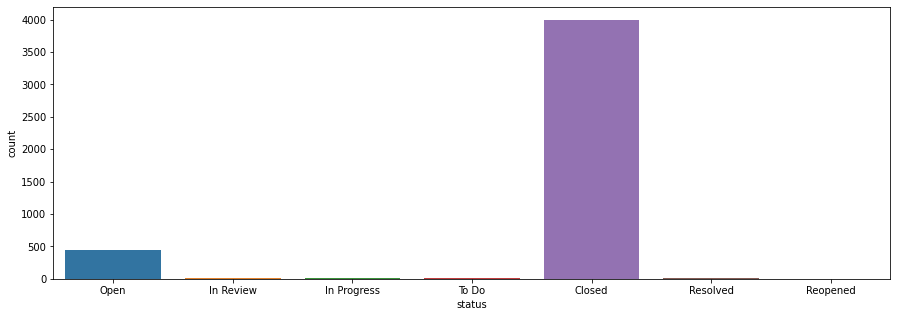

In [443]:
ax = sns.countplot(x="status", data=issues[["issue_id", "status"]])

### Further analysis
* Time between issue reported and closed
* Number of subtasks per issue